In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Titanic dataset into a pandas dataframe.

In [42]:
df = pd.read_csv("data/Titanic-Dataset.csv")


Here we use a bunch of descriptive methods to get a feel for the data:

In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.shape

(891, 12)

In [45]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we will begin with data cleaning. First we will start by identifying missing values:

In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So lets add the median age to any missing ages:

In [49]:
age_med = df['Age'].median()
df['Age'] = df['Age'].fillna(value=age_med)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now for some EDA. We will start by saying the number of people that survived and didn't:

In [50]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Now lets groupby survival and other features such as the Pclass and sex:

In [51]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [52]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Now lets plot some histograms based on Age and Fare:

<Axes: >

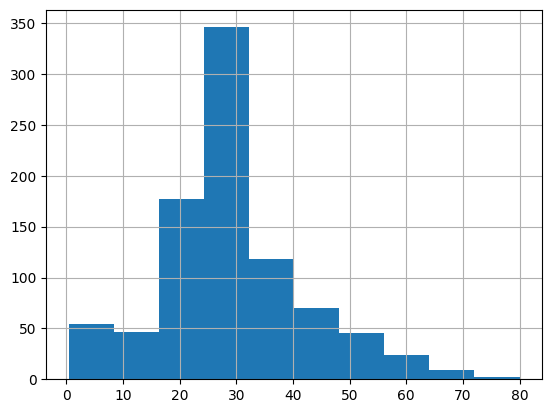

In [53]:
df['Age'].hist()

<Axes: >

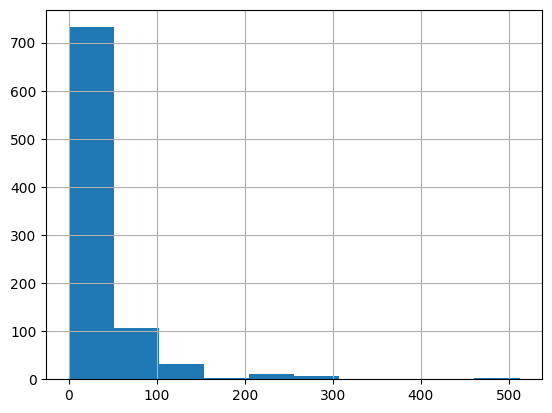

In [54]:
df['Fare'].hist()

And now lets create a boxplot comparing numerical features by category starting with Sex and Age:

<Axes: xlabel='Sex', ylabel='Age'>

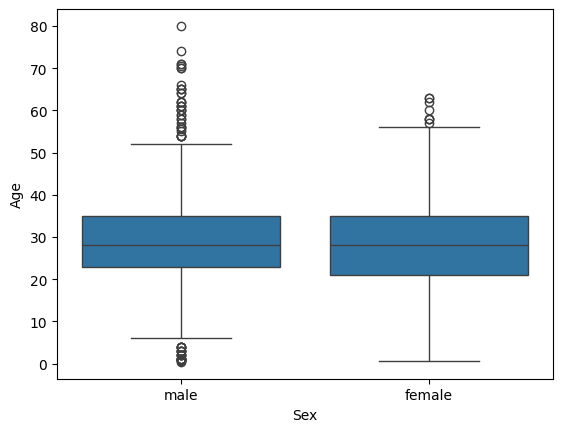

In [55]:
sns.boxplot(x='Sex', y='Age', data=df)

Survived and Age:

<Axes: xlabel='Survived', ylabel='Age'>

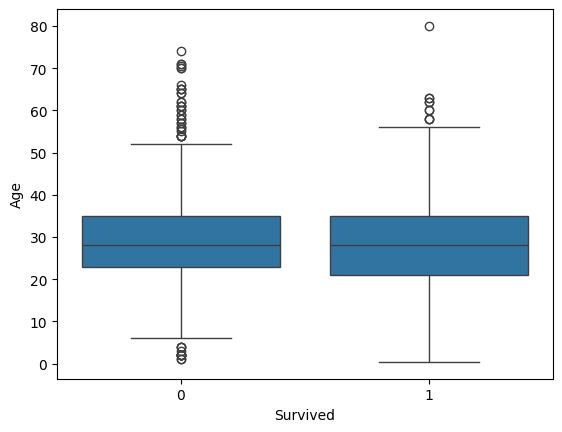

In [56]:
sns.boxplot(x='Survived', y='Age', data=df)

Fare and Pclass:

<Axes: xlabel='Pclass', ylabel='Fare'>

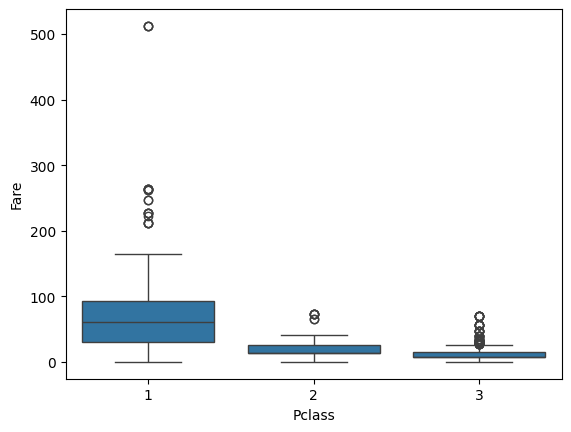

In [57]:
sns.boxplot(x='Pclass', y='Fare', data=df)

Pclass and age with distinction between who survived and who didn't

<Axes: xlabel='Pclass', ylabel='Age'>

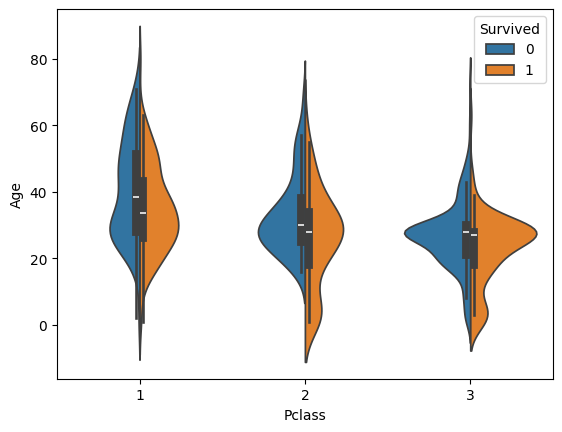

In [58]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)


Now we will use pairplot to compare age and fare since they are the most relevant numerical values:

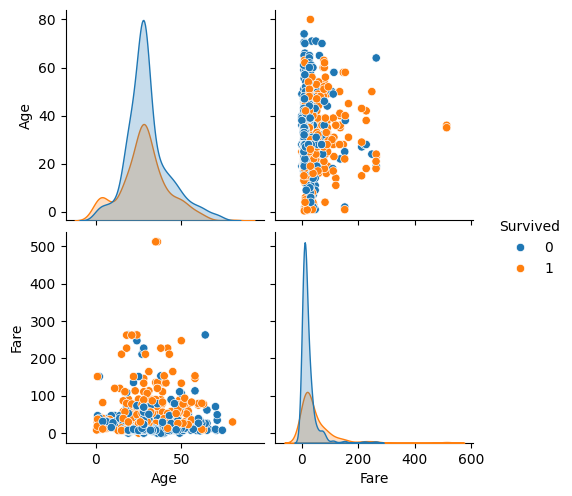

In [59]:
sns.pairplot(df, vars=["Age", "Fare"], hue="Survived")

Now to create a heat map to highlight correlation:

<Axes: >

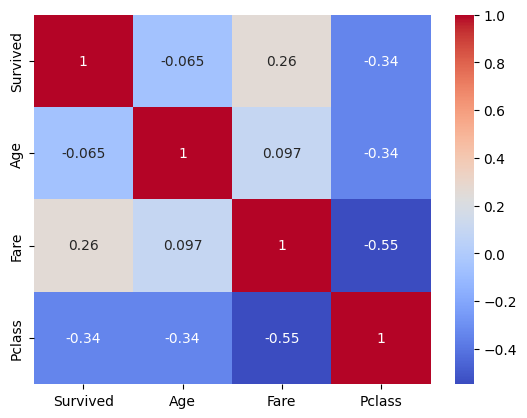

In [60]:
numeric_df = df[["Survived", "Age", "Fare", "Pclass"]]
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")


### EDA Summary

Key findings from the exploratory analysis:

- **Gender played a significant role in survival**: approximately **74% of women survived**, compared to only **18% of men**.

- **Passenger class was inversely correlated with survival**: **first-class passengers** had a much higher survival rate than those in second or third class, showing a **negative correlation between `Pclass` and `Survived`**.

- **Age showed little to no correlation** with survival. While there’s a general perception that younger passengers were prioritized, the data didn’t reveal a strong statistical relationship.

- These results align with widely known historical accounts: **women and children were given priority**, and many lower-class passengers were **trapped or delayed in accessing lifeboats** due to their cabins being below deck.

- **Next steps**: `Pclass` and `Sex` show strong enough signals to consider them for a **survival prediction model** in the future. `Fare` may also be useful due to its correlation with class.

